In [1]:
import xgboost
xgboost.__version__

'1.4.0'

In [2]:
import sklearn
sklearn.__version__

'0.24.1'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data = pd.read_csv("train.csv")

In [5]:
data['Seats'].value_counts()

5.0     5014
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

In [6]:
data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [7]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [8]:
data.shape

(6019, 13)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [10]:
data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

Name : The brand and model of the car\
Location : The location in which the car is being sold or is available for purchase\
Year : The year or edition of the model\
Kilometers_Driven : The total kilometers driven in the car by the previous owner(s) in KM\
Fuel_Type : The type of fuel used by the car\
Transmission : The type of transmission used by the car\
Owner_Type : Whether the ownership is Firsthand, Second hand or other\
Mileage : The standard mileage offered by the car company in kmpl or km/kg\
Engine : The displacement volume of the engine in cc\
Power : The maximum power of the engine in bhp\
Seats : The number of seats in the car\
New_Price : Price of new model\
Price : The price of the used car in INR Lakhs

In [11]:
data.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

# **Feature Engineering**

In [12]:
data.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50


In [13]:
data.describe(include='all')

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
count,6019,6019,6019.000000,6.019000e+03,6019,6019,6019,6017,5983,5983,5977.000000,824,6019.000000
unique,1876,11,NaN,NaN,5,2,4,442,146,372,NaN,540,NaN
top,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,NaN,95.13 Lakh,NaN
freq,49,790,NaN,NaN,3205,4299,4929,172,606,235,NaN,6,NaN
mean,NaN,NaN,2013.358199,5.873838e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.278735,NaN,9.479468
std,NaN,NaN,3.269742,9.126884e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.808840,NaN,11.187917
min,NaN,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.440000
25%,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,3.500000
50%,NaN,NaN,2014.000000,5.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,5.640000
75%,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,9.950000


First we handling Car Name 

In [14]:
car_name = []
for i in data['Name']:
    car_name.append(i.split(" ")[0])

In [15]:
set(car_name)

{'Ambassador',
 'Audi',
 'BMW',
 'Bentley',
 'Chevrolet',
 'Datsun',
 'Fiat',
 'Force',
 'Ford',
 'Honda',
 'Hyundai',
 'ISUZU',
 'Isuzu',
 'Jaguar',
 'Jeep',
 'Lamborghini',
 'Land',
 'Mahindra',
 'Maruti',
 'Mercedes-Benz',
 'Mini',
 'Mitsubishi',
 'Nissan',
 'Porsche',
 'Renault',
 'Skoda',
 'Smart',
 'Tata',
 'Toyota',
 'Volkswagen',
 'Volvo'}

In [16]:
data['Car_Name'] = car_name
data.head(8)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Name
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35,Hyundai
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50,Nissan
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50,Toyota


In [17]:
data['Car_Name'].value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Isuzu               1
Ambassador          1
Lamborghini         1
Smart               1
Bentley             1
Name: Car_Name, dtype: int64

Here we observe that Isuzu and ISUZU both same

In [18]:
data['Car_Name'].replace(to_replace='ISUZU', value='Isuzu',inplace=True)

Mileage, Engine, Power and New_Price having alpha Numerical values so, first we need toto fix these 

In [19]:
# we create new datasets of "Engine", "Power", "New_Price" and "Mileage" with splitting


values_Mileage = []
for x in data['Mileage'].dropna():
    values_Mileage.append(float(str(x).split()[0]))
Mileage_new_df = pd.DataFrame(data = values_Mileage, index=data['Mileage'].dropna().index,columns=['Mileage_new'])

values_Engine = []
for x in data['Engine'].dropna():
    values_Engine.append(float(str(x).split()[0]))
Engine_new_df = pd.DataFrame(data = values_Engine, index=data['Engine'].dropna().index,columns=['Engine_new'])

values_Power = []
for x in data['Power'].dropna():
        values_Power.append(((str(x).split()[0])))
values_Power_df = pd.DataFrame(data = values_Power, index=data['Power'].dropna().index,columns=['Power_new'])

values_New_Price = []
for x in data['New_Price'].dropna():
        values_New_Price.append(((str(x).split()[0])))
values_New_Price_df = pd.DataFrame(data = values_New_Price, index=data['New_Price'].dropna().index,columns=['Purchase_Price'])

In [20]:
data_new = pd.concat([data, Mileage_new_df, Engine_new_df,values_Power_df,values_New_Price_df],axis=1)
data_new.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Name,Mileage_new,Engine_new,Power_new,Purchase_Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,26.60,998.0,58.16,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,19.67,1582.0,126.2,NaN
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,18.20,1199.0,88.7,8.61
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,20.77,1248.0,88.76,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,15.20,1968.0,140.8,NaN


In [21]:
# reomiving columns 'Mileage', 'Engine' and 'Power'

data_new.drop(['Mileage', 'Engine', 'Power','New_Price'], axis=1, inplace=True)

In [22]:
data_new.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                  42
Price                   0
Car_Name                0
Mileage_new             2
Engine_new             36
Power_new              36
Purchase_Price       5195
dtype: int64

In [23]:
data_new.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Seats                float64
Price                float64
Car_Name              object
Mileage_new          float64
Engine_new           float64
Power_new             object
Purchase_Price        object
dtype: object

In [24]:
# for checking null values in Power

value = []
for i in data_new.Power_new:
  if '.' not in str(i):
    value.append(i)

check = []  
for x in value:
  if str(x).isnumeric() == False:
    check.append(x)

set(check)

{nan, 'null'}

In [25]:
data_new[data_new.Power_new == 'null']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Car_Name,Mileage_new,Engine_new,Power_new,Purchase_Price
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,5.0,2.00,Ford,17.80,1399.0,null,NaN
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,5.0,1.30,Hyundai,0.00,1086.0,null,NaN
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,5.0,2.10,Hyundai,17.00,1086.0,null,NaN
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,5.0,0.85,Hyundai,17.00,1086.0,null,NaN
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,5.0,1.67,Hyundai,17.00,1086.0,null,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5873,Hyundai Santro Xing XO eRLX Euro II,Pune,2006,47200,Petrol,Manual,Second,5.0,1.20,Hyundai,17.00,1086.0,null,NaN
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,NaN,1.75,Maruti,19.50,1061.0,null,NaN
5925,Skoda Laura Classic 1.8 TSI,Pune,2010,85000,Petrol,Manual,First,5.0,2.85,Skoda,17.50,1798.0,null,NaN
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,6.0,1.70,Mahindra,0.00,2112.0,null,NaN


In [26]:
data_new.Power_new.replace(to_replace='null', value=np.nan, inplace=True)

In [27]:
data_new['Purchase_Price'] = data_new['Purchase_Price'].astype(float)
data_new['Power_new'] = data_new['Power_new'].astype(float)

In [28]:
data_new.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Seats                float64
Price                float64
Car_Name              object
Mileage_new          float64
Engine_new           float64
Power_new            float64
Purchase_Price       float64
dtype: object

In [29]:
data_new.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                  42
Price                   0
Car_Name                0
Mileage_new             2
Engine_new             36
Power_new             143
Purchase_Price       5195
dtype: int64

In [30]:
data_new.describe()

,Year,Kilometers_Driven,Seats,Price,Mileage_new,Engine_new,Power_new,Purchase_Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000,6017.000000,5983.000000,5876.000000,824.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468,18.134961,1621.276450,113.253050,20.320716
std,3.269742,9.126884e+04,0.808840,11.187917,4.582289,601.355233,53.874957,20.198119
min,1998.000000,1.710000e+02,0.000000,0.440000,0.000000,72.000000,34.200000,1.000000
25%,2011.000000,3.400000e+04,5.000000,3.500000,15.170000,1198.000000,75.000000,7.845000
50%,2014.000000,5.300000e+04,5.000000,5.640000,18.150000,1493.000000,97.700000,11.415000
75%,2016.000000,7.300000e+04,5.000000,9.950000,21.100000,1984.000000,138.100000,24.010000
max,2019.000000,6.500000e+06,10.000000,160.000000,33.540000,5998.000000,560.000000,99.920000


Here Seats and Mileage_new contain '0' values. So, we need to be fix these

In [31]:
data_new[data_new.Seats == 0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Car_Name,Mileage_new,Engine_new,Power_new,Purchase_Price
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,0.0,18.0,Audi,10.5,3197.0,NaN,NaN


In [32]:
data_new[data_new.Mileage_new == 0].shape

(68, 14)

In [33]:
data_new['Seats']= data_new.Seats.replace(0,np.nan)
data_new['Mileage_new'] = data_new.Mileage_new.replace(0,np.nan)

In [34]:
data_new.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                  43
Price                   0
Car_Name                0
Mileage_new            70
Engine_new             36
Power_new             143
Purchase_Price       5195
dtype: int64

In [35]:
X = data_new.drop(['Price'],axis=1)
y = data_new['Price']

In [36]:
# Splitting data into train and test for feature Engineering

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.19 ,random_state=1)

In [37]:
X_train['Car_Name'].unique()

array(['Renault', 'Maruti', 'Mercedes-Benz', 'Hyundai', 'Ford',
       'Volkswagen', 'Toyota', 'BMW', 'Skoda', 'Mahindra', 'Audi',
       'Honda', 'Chevrolet', 'Porsche', 'Jeep', 'Land', 'Nissan',
       'Jaguar', 'Mitsubishi', 'Tata', 'Fiat', 'Volvo', 'Datsun', 'Isuzu',
       'Mini', 'Force', 'Ambassador', 'Lamborghini', 'Smart', 'Bentley'],
      dtype=object)

In [38]:
X_test['Car_Name'].unique()

array(['Mercedes-Benz', 'Maruti', 'Ford', 'Honda', 'Volkswagen',
       'Renault', 'Hyundai', 'Chevrolet', 'Audi', 'Mahindra', 'Toyota',
       'Skoda', 'BMW', 'Land', 'Mini', 'Mitsubishi', 'Tata', 'Jeep',
       'Jaguar', 'Isuzu', 'Porsche', 'Nissan', 'Datsun', 'Fiat', 'Volvo'],
      dtype=object)

In [39]:
X_train.shape, X_test.shape

((4875, 13), (1144, 13))

In [40]:
print(X_train.isna().sum())
print('--'*20)
print(X_test.isna().sum())

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                  39
Car_Name                0
Mileage_new            57
Engine_new             33
Power_new             113
Purchase_Price       4225
dtype: int64
----------------------------------------
Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Seats                  4
Car_Name               0
Mileage_new           13
Engine_new             3
Power_new             30
Purchase_Price       970
dtype: int64


# **Handling Null values**

##### For Seats

In [41]:
X_train.Seats.value_counts()

5.0     4066
7.0      537
8.0      106
4.0       84
6.0       23
2.0       13
10.0       4
9.0        3
Name: Seats, dtype: int64

In [42]:
median = X_train.Seats.median()
median

5.0

In [43]:
df = X_train.copy()

In [44]:
df.Seats.fillna(median,inplace=True)

##### For Mileage_new

In [45]:
Mean = df['Mileage_new'].mean()
Mean

18.354991697799917

In [46]:
df["Mileage_mean"] = df['Mileage_new'].fillna(Mean)

In [47]:
df.drop(['Mileage_new'],axis=1,inplace=True)

In [48]:
df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                   0
Car_Name                0
Engine_new             33
Power_new             113
Purchase_Price       4225
Mileage_mean            0
dtype: int64

##### For Engine_new and Power_new

In [49]:
Mean = df['Engine_new'].mean()
df["Engine_mean"] = df['Engine_new'].fillna(Mean)

Mean = df['Power_new'].mean()
df["Power_mean"] = df['Power_new'].fillna(Mean)

In [50]:
df.drop(['Engine_new', 'Power_new'],axis=1,inplace=True)

In [51]:
df.isna().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                   0
Car_Name                0
Purchase_Price       4225
Mileage_mean            0
Engine_mean             0
Power_mean              0
dtype: int64

##### For Purchase_Price

In [52]:
df.Purchase_Price.isna().mean()

0.8666666666666667

In [53]:
# Purchase_Price contains more than 80% Null values so we will capture this and drop that feature

df['Purchase_Price_ide'] = np.where(df['Purchase_Price'].isna(),1,0)

In [54]:
df.drop(['Purchase_Price'],axis=1,inplace=True)

In [55]:
df.isna().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Seats                 0
Car_Name              0
Mileage_mean          0
Engine_mean           0
Power_mean            0
Purchase_Price_ide    0
dtype: int64

# **EDA**

C:\Users\Administrator\anaconda3\envs\bikes\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Administrator\anaconda3\envs\bikes\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Administrator\anaconda3\envs\bikes\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a

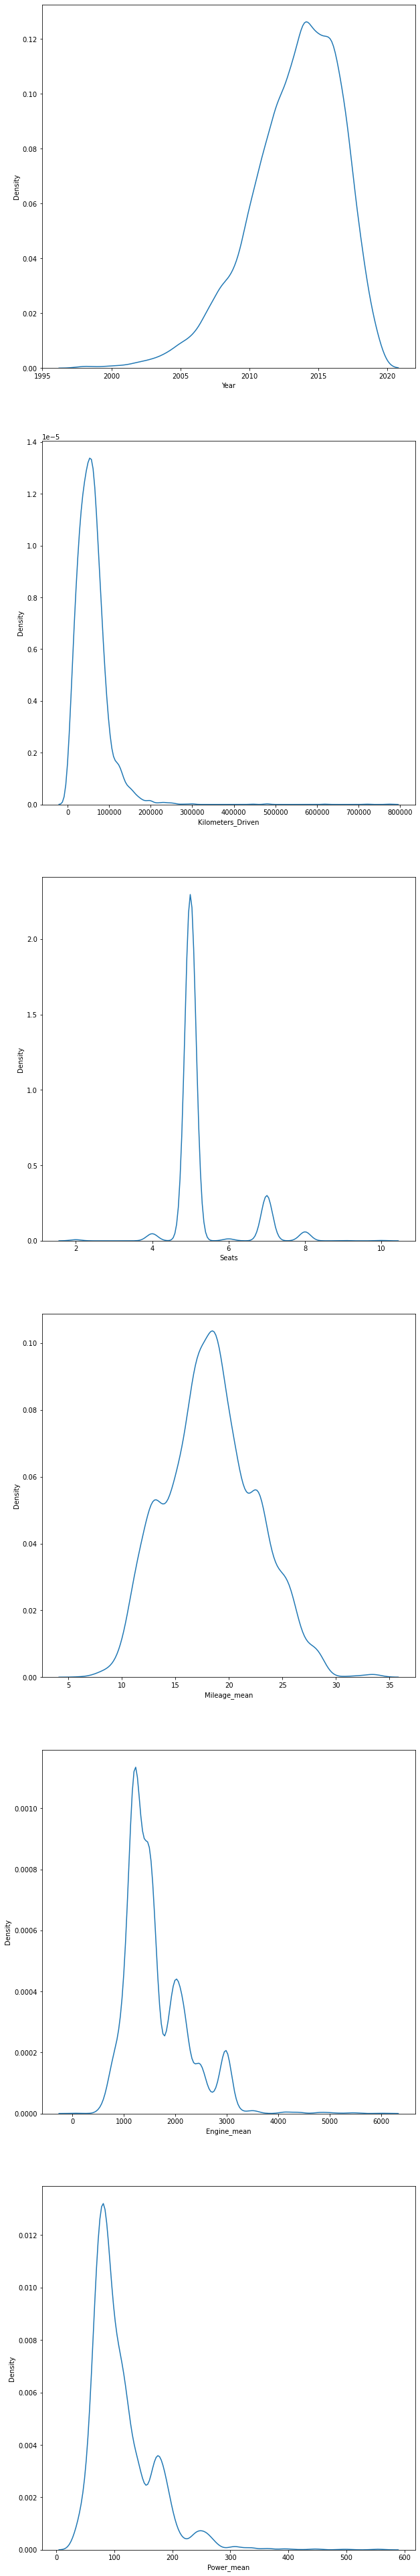

In [56]:
data_num = df[['Year', 'Kilometers_Driven', 'Seats', 'Mileage_mean', 'Engine_mean', 'Power_mean']]

fig, ax = plt.subplots(nrows=len(data_num.columns),figsize=(10,70))

for i in range(len(data_num.columns)):
    sns.distplot(data_num[data_num.columns[i]], hist=False, ax=ax[i])

C:\Users\Administrator\anaconda3\envs\bikes\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Administrator\anaconda3\envs\bikes\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Administrator\anaconda3\envs\bikes\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

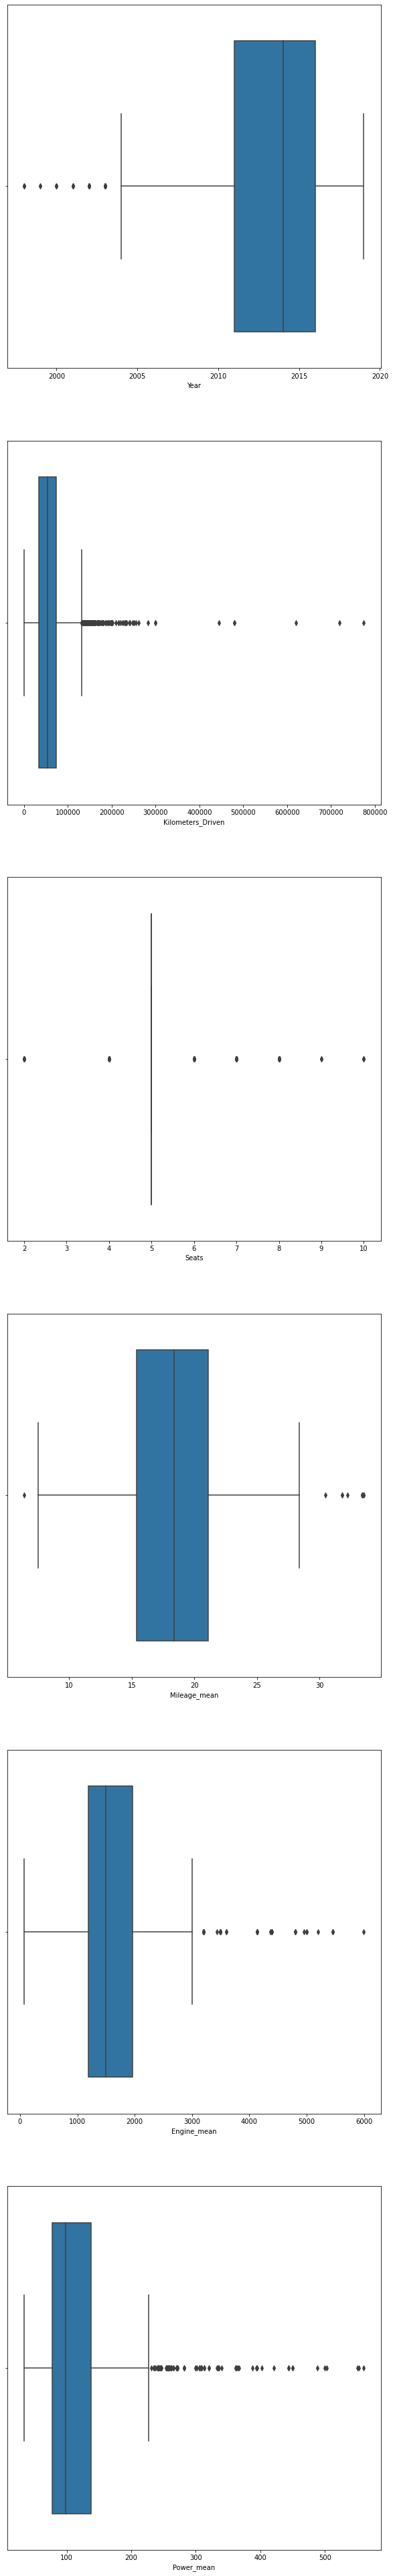

In [57]:
fig, ax = plt.subplots(nrows=len(data_num.columns),figsize=(10,70))

for i in range(len(data_num.columns)):
    sns.boxplot(data_num[data_num.columns[i]], ax=ax[i])

C:\Users\Administrator\anaconda3\envs\bikes\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Administrator\anaconda3\envs\bikes\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Administrator\anaconda3\envs\bikes\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

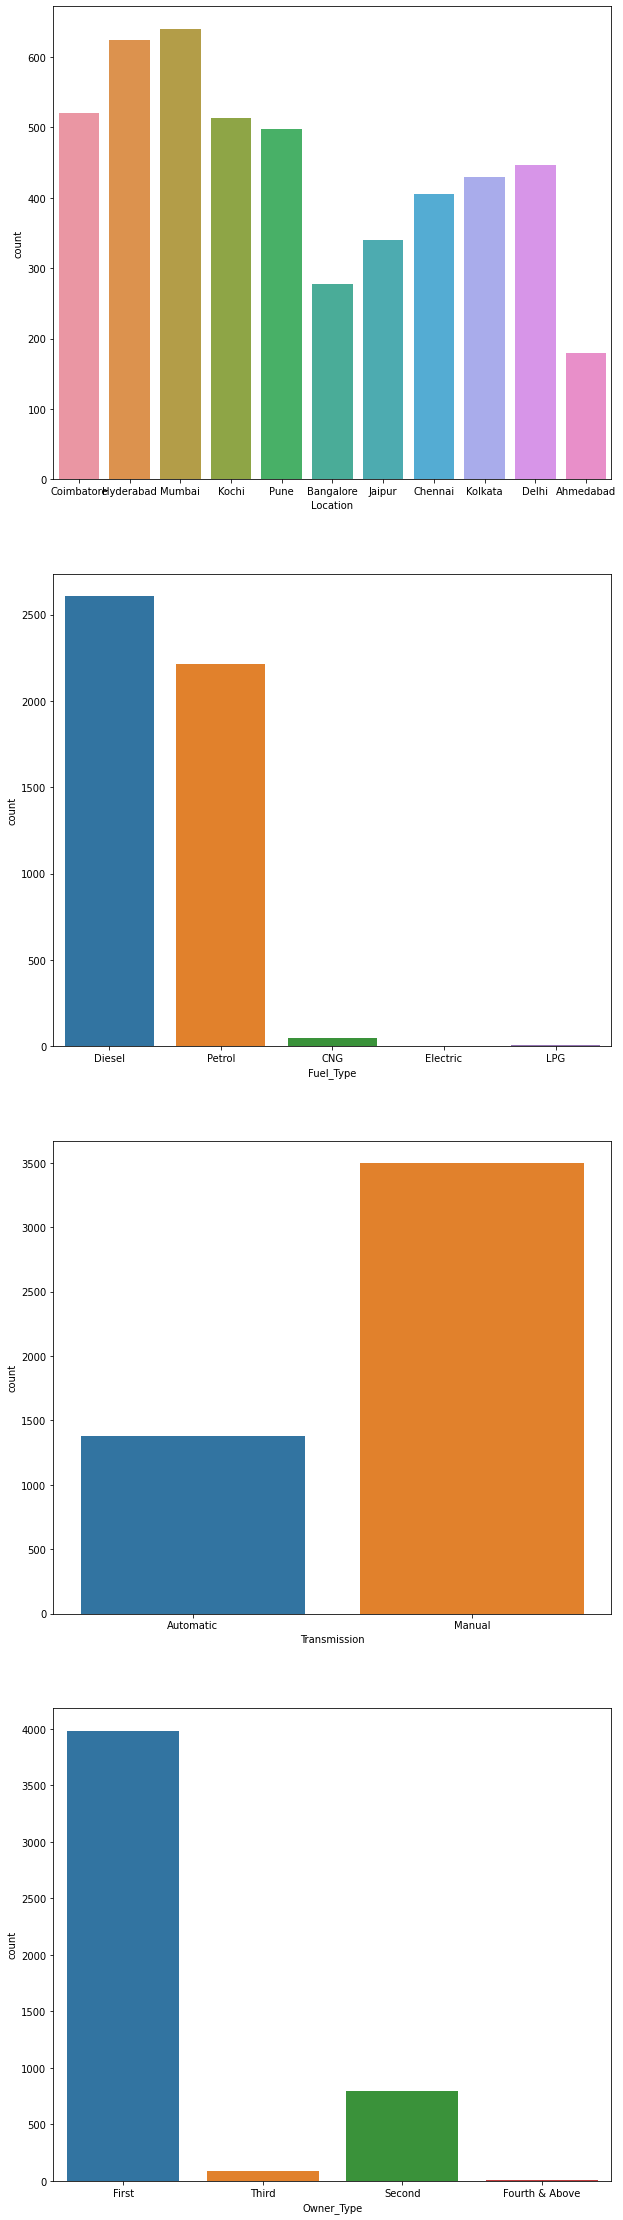

In [58]:
data_cat = df[['Location', 'Fuel_Type', 'Transmission', 'Owner_Type']]

fig, ax = plt.subplots(nrows=len(data_cat.columns),figsize=(10,40))

for i in range(len(data_cat.columns)):
    sns.countplot(data_cat[data_cat.columns[i]], ax=ax[i])

In [59]:
# How many cars are in year

pd.pivot_table(df,values='Name',index='Year',aggfunc='count').reset_index().sort_values('Name',ascending=False)

,Year,Name
16,2014,644
18,2016,607
17,2015,579
15,2013,522
14,2012,475
19,2017,466
13,2011,382
12,2010,288
20,2018,234
11,2009,169


In [60]:
# How old car is ?
df['Old'] = 2021 - df['Year']
df['Old']

3518     4
5821     9
5461    11
3285     5
726      3
        ..
905     13
5192    13
3980    11
235      2
5157     5
Name: Old, Length: 4875, dtype: int64

C:\Users\Administrator\anaconda3\envs\bikes\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Kilometers_Driven'}>],
       [<AxesSubplot:title={'center':'Seats'}>,
        <AxesSubplot:title={'center':'Mileage_mean'}>],
       [<AxesSubplot:title={'center':'Engine_mean'}>,
        <AxesSubplot:title={'center':'Power_mean'}>]], dtype=object)

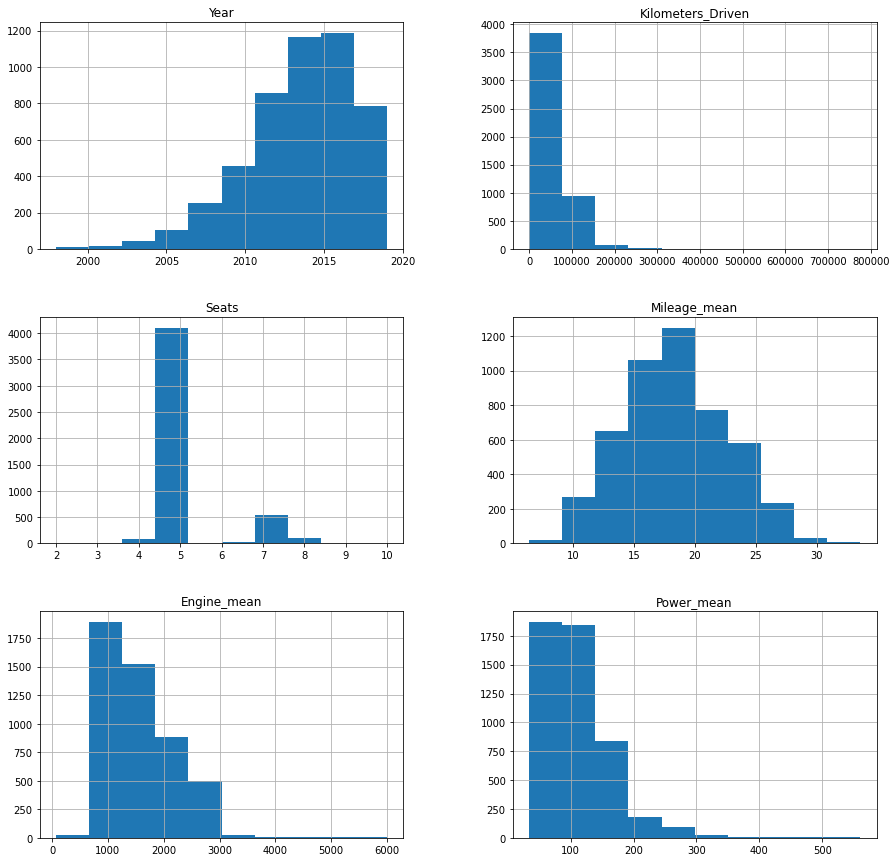

In [61]:
data_num.hist(figsize=(15,15))

<Figure size 1080x1080 with 0 Axes>

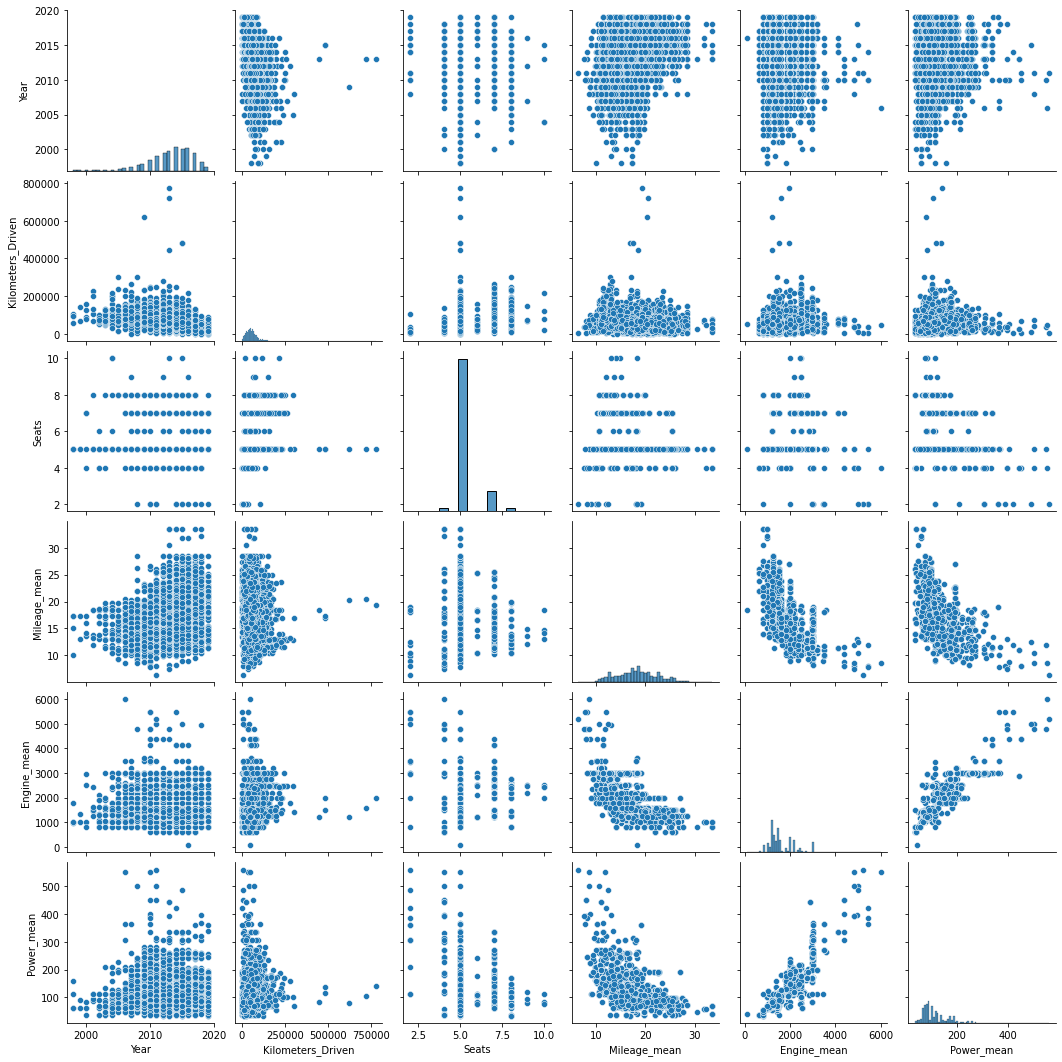

In [62]:
plt.figure(figsize=(15,15))
sns.pairplot(data_num)

In [63]:
df.shape , y_train.shape

((4875, 14), (4875,))

C:\Users\Administrator\anaconda3\envs\bikes\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Location', ylabel='Price'>

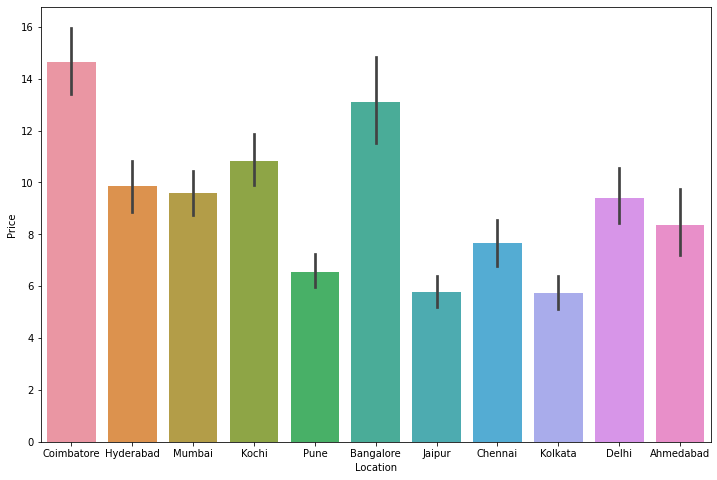

In [64]:
# Price distribution based on Location

plt.figure(figsize=(12,8))
sns.barplot(df['Location'], y_train)

C:\Users\Administrator\anaconda3\envs\bikes\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fuel_Type', ylabel='Price'>

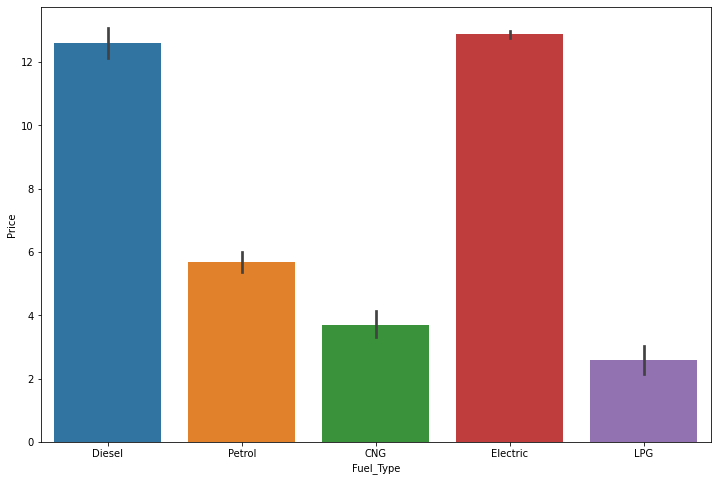

In [65]:
# Price distribution based on Fuel_Type

plt.figure(figsize=(12,8))
sns.barplot(df['Fuel_Type'], y_train)

C:\Users\Administrator\anaconda3\envs\bikes\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Car_Name', ylabel='Price'>

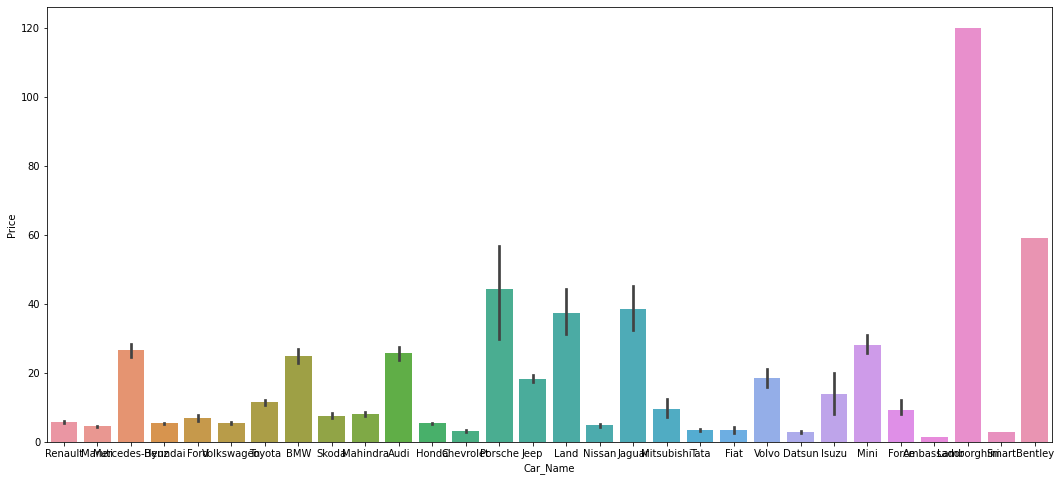

In [66]:
# Price distribution based on Car Name

plt.figure(figsize=(18,8))
sns.barplot(df['Car_Name'], y_train)

C:\Users\Administrator\anaconda3\envs\bikes\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Transmission', ylabel='Price'>

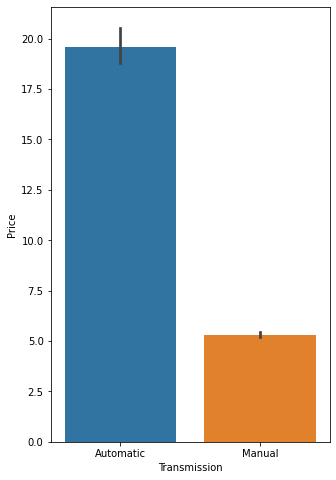

In [67]:
# Price distribution based on Transmission

plt.figure(figsize=(5,8))
sns.barplot(df['Transmission'], y_train)

C:\Users\Administrator\anaconda3\envs\bikes\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Owner_Type', ylabel='Price'>

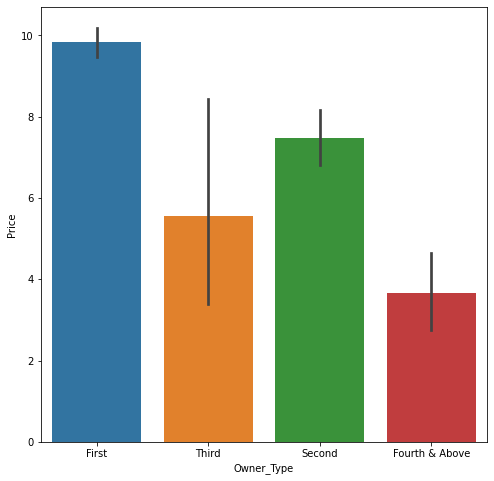

In [68]:
# Price distribution based on Owner_Type

plt.figure(figsize=(8,8))
sns.barplot(df['Owner_Type'], y_train)

In [69]:
df.drop(['Name'],axis=1,inplace=True)

In [70]:
df.drop(['Year'],axis=1,inplace=True)

# **Feature Encoding**

##### For Car_Name, Location and Fuel_Type : Mean encoding

In [71]:
df_mean_enc = pd.concat([df[['Car_Name','Location','Fuel_Type']],y_train],axis=1)

In [72]:
df_mean_enc.head()

,Car_Name,Location,Fuel_Type,Price
3518,Renault,Coimbatore,Diesel,12.46
5821,Maruti,Coimbatore,Petrol,5.35
5461,Mercedes-Benz,Hyderabad,Diesel,21.00
3285,Hyundai,Mumbai,Petrol,5.45
726,Ford,Kochi,Petrol,9.10


In [73]:
# for Car_Name

df_mean_enc.groupby(df_mean_enc['Car_Name'])['Price'].mean()

Car_Name
Ambassador         1.350000
Audi              25.687647
BMW               24.764170
Bentley           59.000000
Chevrolet          3.109808
Datsun             2.943636
Fiat               3.474545
Force              9.333333
Ford               6.801526
Honda              5.353683
Hyundai            5.350571
Isuzu             14.000000
Jaguar            38.480588
Jeep              18.320833
Lamborghini      120.000000
Land              37.474200
Mahindra           8.055000
Maruti             4.484636
Mercedes-Benz     26.496080
Mini              28.215238
Mitsubishi         9.568500
Nissan             4.806267
Porsche           44.315455
Renault            5.762000
Skoda              7.601164
Smart              3.000000
Tata               3.434000
Toyota            11.475491
Volkswagen         5.412797
Volvo             18.652143
Name: Price, dtype: float64

In [74]:
dict_name = df_mean_enc.groupby(df_mean_enc['Car_Name'])['Price'].mean().to_dict()
dict_name

{'Ambassador': 1.35,
 'Audi': 25.687647058823522,
 'BMW': 24.76417040358744,
 'Bentley': 59.0,
 'Chevrolet': 3.109807692307693,
 'Datsun': 2.9436363636363634,
 'Fiat': 3.4745454545454537,
 'Force': 9.333333333333334,
 'Ford': 6.801526104417671,
 'Honda': 5.353683168316831,
 'Hyundai': 5.350570776255696,
 'Isuzu': 14.0,
 'Jaguar': 38.480588235294114,
 'Jeep': 18.320833333333336,
 'Lamborghini': 120.0,
 'Land': 37.474199999999996,
 'Mahindra': 8.055000000000001,
 'Maruti': 4.484635897435896,
 'Mercedes-Benz': 26.49607999999999,
 'Mini': 28.215238095238096,
 'Mitsubishi': 9.568499999999998,
 'Nissan': 4.806266666666667,
 'Porsche': 44.31545454545455,
 'Renault': 5.762000000000002,
 'Skoda': 7.601164383561648,
 'Smart': 3.0,
 'Tata': 3.434,
 'Toyota': 11.475490797546001,
 'Volkswagen': 5.412796934865907,
 'Volvo': 18.652142857142856}

In [75]:
df['Car_Name'] = df['Car_Name'].map(dict_name)

In [76]:
# for Location

df_mean_enc.groupby(df_mean_enc['Location'])['Price'].mean()

Location
Ahmedabad      8.357000
Bangalore     13.085957
Chennai        7.673778
Coimbatore    14.655797
Delhi          9.410470
Hyderabad      9.850321
Jaipur         5.764353
Kochi         10.840351
Kolkata        5.725419
Mumbai         9.583875
Pune           6.544498
Name: Price, dtype: float64

In [77]:
dict_loc = df_mean_enc.groupby(df_mean_enc['Location'])['Price'].mean().to_dict()
dict_loc

{'Ahmedabad': 8.357000000000003,
 'Bangalore': 13.085956678700358,
 'Chennai': 7.673777777777777,
 'Coimbatore': 14.655796545105572,
 'Delhi': 9.410469798657706,
 'Hyderabad': 9.850320512820494,
 'Jaipur': 5.764352941176472,
 'Kochi': 10.840350877192984,
 'Kolkata': 5.725418604651157,
 'Mumbai': 9.583874999999992,
 'Pune': 6.544497991967872}

In [78]:
df['Location'] = df['Location'].map(dict_loc)

In [79]:
# for Fuel_Type

df_mean_enc.groupby(df_mean_enc['Fuel_Type'])['Price'].mean()

Fuel_Type
CNG          3.691277
Diesel      12.593477
Electric    12.875000
LPG          2.600000
Petrol       5.676608
Name: Price, dtype: float64

In [80]:
dict_fuel = df_mean_enc.groupby(df_mean_enc['Fuel_Type'])['Price'].mean().to_dict()

In [81]:
dict_fuel

{'CNG': 3.6912765957446805,
 'Diesel': 12.593476592478947,
 'Electric': 12.875,
 'LPG': 2.6,
 'Petrol': 5.6766079494128245}

In [82]:
df['Fuel_Type'] = df['Fuel_Type'].map(dict_fuel)

In [83]:
df.dtypes

Location              float64
Kilometers_Driven       int64
Fuel_Type             float64
Transmission           object
Owner_Type             object
Seats                 float64
Car_Name              float64
Mileage_mean          float64
Engine_mean           float64
Power_mean            float64
Purchase_Price_ide      int32
Old                     int64
dtype: object

##### Ordinal Encoding for Owner_Type

In [84]:
df.Owner_Type.unique()

array(['First', 'Third', 'Second', 'Fourth & Above'], dtype=object)

In [85]:
# we observe that less number of owners having high price

dict_of_OwnerType = {'Fourth & Above' : 0, 'Third' : 1, 'Second' : 2, 'First' : 3}

df['Owner_Type'] = df['Owner_Type'].map(dict_of_OwnerType)
df['Owner_Type']

3518    3
5821    3
5461    3
3285    3
726     3
       ..
905     2
5192    3
3980    3
235     3
5157    3
Name: Owner_Type, Length: 4875, dtype: int64

##### One Hot Encoding for Transmission

In [86]:
dummy = pd.get_dummies(df['Transmission'],drop_first=True)
dummy

,Manual
3518,0
5821,1
5461,0
3285,0
726,0
...,...
905,1
5192,1
3980,1
235,0


In [87]:
df = df.join([dummy])

In [88]:
df.drop(['Transmission'],axis=1,inplace=True)

In [89]:
df.shape, y_train.shape

((4875, 12), (4875,))

In [90]:
df.dtypes

Location              float64
Kilometers_Driven       int64
Fuel_Type             float64
Owner_Type              int64
Seats                 float64
Car_Name              float64
Mileage_mean          float64
Engine_mean           float64
Power_mean            float64
Purchase_Price_ide      int32
Old                     int64
Manual                  uint8
dtype: object

In [91]:
df['Manual'] = df.Manual.astype(int)

# **Feature Selection**

##### Feature Importance

In [92]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(df, y_train)

ExtraTreesRegressor()

In [93]:
model.feature_importances_

array([0.01787105, 0.03238526, 0.04169836, 0.0046737 , 0.03129846,
       0.18577895, 0.02251963, 0.07669318, 0.17577124, 0.01547016,
       0.14963918, 0.24620082])

In [94]:
feature_importance = pd.DataFrame({'Column':df.columns,'Importance':model.feature_importances_})
feature_importance

,Column,Importance
0,Location,0.017871
1,Kilometers_Driven,0.032385
2,Fuel_Type,0.041698
3,Owner_Type,0.004674
4,Seats,0.031298
5,Car_Name,0.185779
6,Mileage_mean,0.022520
7,Engine_mean,0.076693
8,Power_mean,0.175771
9,Purchase_Price_ide,0.015470


<AxesSubplot:>

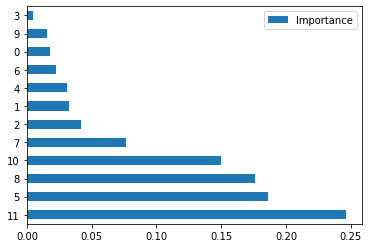

In [95]:
feature_importance.sort_values('Importance',ascending=False).plot(kind='barh')

##### Imformation Gain

In [96]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(df,y_train)

mutual_info_df = pd.DataFrame({'column':df.columns,'info':mutual_info})
mutual_info_df.sort_values('info')

,column,info
9,Purchase_Price_ide,0.023966
3,Owner_Type,0.029517
1,Kilometers_Driven,0.069679
4,Seats,0.083295
2,Fuel_Type,0.133365
0,Location,0.189241
11,Manual,0.225914
10,Old,0.283138
6,Mileage_mean,0.448714
5,Car_Name,0.448941


##### Correlation

In [97]:
corr = df.corr()
corr

,Location,Kilometers_Driven,Fuel_Type,Owner_Type,Seats,Car_Name,Mileage_mean,Engine_mean,Power_mean,Purchase_Price_ide,Old,Manual
Location,1.000000,-0.120224,0.037700,0.079258,0.043602,0.136663,-0.076942,0.128604,0.152036,-0.090122,-0.246095,-0.148177
Kilometers_Driven,-0.120224,1.000000,0.220244,-0.204325,0.211081,-0.037844,-0.143599,0.155825,0.006575,0.170224,0.428682,0.101320
Fuel_Type,0.037700,0.220244,1.000000,0.043810,0.299752,0.301866,0.103612,0.414503,0.279112,-0.007379,-0.127117,-0.145975
Owner_Type,0.079258,-0.204325,0.043810,1.000000,-0.000176,-0.033789,0.154416,-0.050528,-0.031006,-0.117385,-0.392503,0.001908
Seats,0.043602,0.211081,0.299752,-0.000176,1.000000,-0.021171,-0.341908,0.384640,0.091872,-0.017717,-0.021760,0.069384
Car_Name,0.136663,-0.037844,0.301866,-0.033789,-0.021171,1.000000,-0.399842,0.649680,0.763517,-0.041177,-0.013217,-0.656263
Mileage_mean,-0.076942,-0.143599,0.103612,0.154416,-0.341908,-0.399842,1.000000,-0.641848,-0.550454,-0.116279,-0.302421,0.361054
Engine_mean,0.128604,0.155825,0.414503,-0.050528,0.384640,0.649680,-0.641848,1.000000,0.863764,-0.008140,0.060482,-0.499483
Power_mean,0.152036,0.006575,0.279112,-0.031006,0.091872,0.763517,-0.550454,0.863764,1.000000,-0.064473,-0.003047,-0.635880
Purchase_Price_ide,-0.090122,0.170224,-0.007379,-0.117385,-0.017717,-0.041177,-0.116279,-0.008140,-0.064473,1.000000,0.303533,0.088407


<AxesSubplot:>

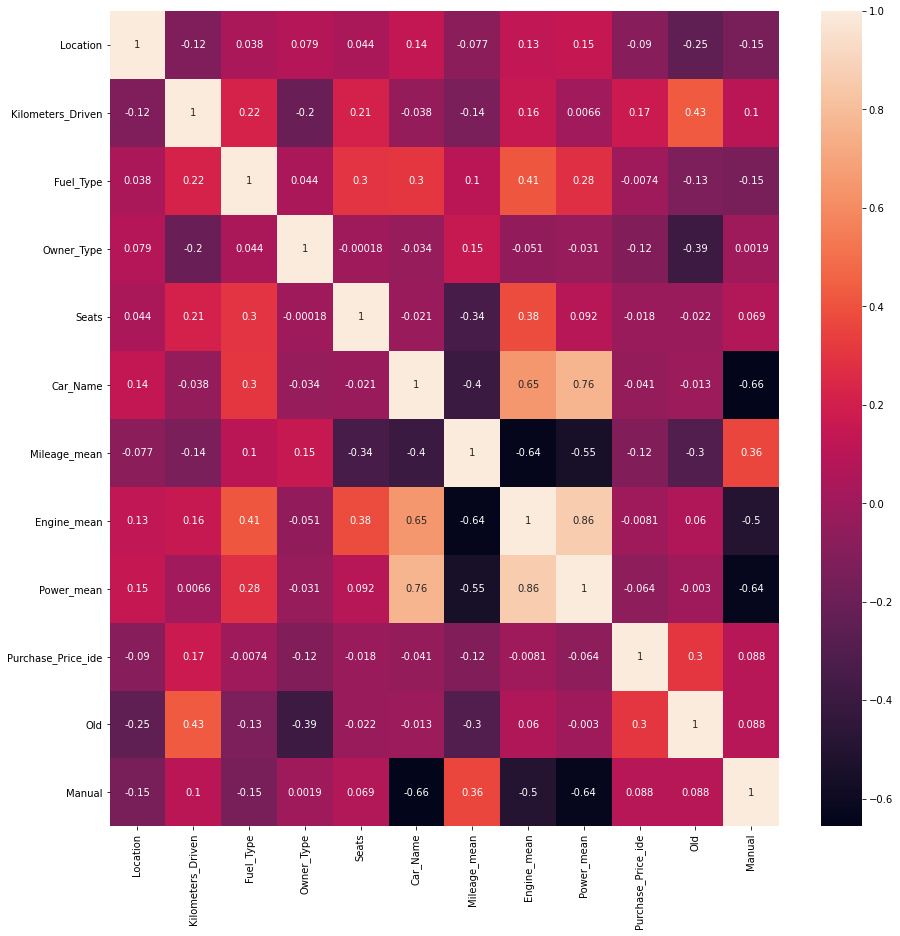

In [98]:
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True)

# Model Selection

In [99]:
# Scaling

from sklearn.preprocessing import StandardScaler

In [101]:
df.to_csv('X_new.csv',index =False)

vbsmwvkwr35n4s-n
+*etn

In [ ]:
scaler = StandardScaler()

X_new = scaler.fit_transform(df)
X_new

In [ ]:
X_new = pd.DataFrame(X_new,columns=df.columns)
X_new.head()

In [ ]:
X_new.shape, y_train.shape

In [ ]:
from sklearn.model_selection import cross_val_score

#### For Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_new, y_train)

In [ ]:
model.score(X_new, y_train)

In [ ]:
score = cross_val_score(model, X_new, y_train, cv=10, n_jobs=-1)
score

In [ ]:
score.mean()

#### Decision Tree Regressor

In [ ]:

from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_new,y_train)

In [ ]:
score = cross_val_score(model, X_new, y_train, cv=10, n_jobs=-1)

In [ ]:
score.mean()

#### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_new,y_train)

In [ ]:
score = cross_val_score(model, X_new, y_train, cv=10, n_jobs=-1, scoring='r2')

In [ ]:
score

In [ ]:
score.mean()

#### Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor()
model.fit(X_new,y_train)

In [ ]:
score = cross_val_score(model, X_new, y_train, cv=10, n_jobs=-1)

In [ ]:
score.mean()

#### Gradient boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_new, y_train)

In [ ]:
score = cross_val_score(model, X_new, y_train, cv=10, n_jobs=-1)
score

In [ ]:
score.mean()

#### XGboost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model = XGBRegressor()
model.fit(X_new,y_train)

In [ ]:
score = cross_val_score(model, X_new, y_train, cv=10, n_jobs=-1)
score

In [ ]:
score.mean()

# Feature Engineering for test data

In [ ]:
median = X_test.Seats.median()
data_test = X_test.copy()
data_test.Seats.fillna(median,inplace=True)

Mean = data_test['Mileage_new'].mean()
data_test["Mileage_mean"] = data_test['Mileage_new'].fillna(Mean)
data_test.drop(['Mileage_new'],axis=1,inplace=True)

Mean = data_test['Engine_new'].mean()
data_test["Engine_mean"] = data_test['Engine_new'].fillna(Mean)

Mean = data_test['Power_new'].mean()
data_test["Power_mean"] = data_test['Power_new'].fillna(Mean)

data_test.drop(['Engine_new', 'Power_new'],axis=1,inplace=True)

data_test['Purchase_Price_ide'] = np.where(data_test['Purchase_Price'].isna(),1,0)
data_test.drop(['Purchase_Price'],axis=1,inplace=True)

data_test['Car_Name'] = data_test['Car_Name'].map(dict_name)

data_test['Location'] = data_test['Location'].map(dict_loc)

data_test['Fuel_Type'] = data_test['Fuel_Type'].map(dict_fuel)

dict_of_OwnerType = {'Fourth & Above' : 0, 'Third' : 1, 'Second' : 2, 'First' : 3}
data_test['Owner_Type'] = data_test['Owner_Type'].map(dict_of_OwnerType)

dummy = pd.get_dummies(data_test['Transmission'],drop_first=True)
data_test = data_test.join([dummy])
data_test.drop(['Transmission'],axis=1,inplace=True)
data_test['Manual'] = data_test.Manual.astype(int)



In [ ]:
data_test.drop(['Name'],axis=True,inplace=True)

In [ ]:
X_new.head()

In [ ]:
data_test['Old'] = 2021 - data_test['Year']

In [ ]:
data_test.drop(['Year'],axis=True,inplace=True)

In [ ]:
df_test = scaler.fit_transform(data_test)

data_test = pd.DataFrame(df_test,columns=data_test.columns)
data_test.head()

In [ ]:
data_test.shape, y_test.shape

In [ ]:
data_test.isna().sum()

# Hyper Parameter Tunning
### For Random Forest, Gradient Boosting and XGBoost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#### For Random Forest

In [ ]:
np.arange(1, 11, 1)

In [ ]:
param = {'bootstrap': [True, False],
         'max_depth': [int(i) for i in np.arange(10, 110, 10)],
         'max_features': ['auto', 'sqrt'],
         'min_samples_leaf': [i for i in np.arange(1, 11, 1)],
         'min_samples_split': [i for i in np.arange(2, 12, 2)],
         'n_estimators': [i for i in np.arange(100, 1100, 100)]}


In [ ]:
model_rf = RandomForestRegressor()

In [ ]:
rf_random = RandomizedSearchCV(estimator = model_rf, param_distributions = param, scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
rf_random.fit(X_new, y_train)

In [ ]:
rf_random.best_params_

In [ ]:
rf_random.best_estimator_

In [ ]:
rf_random.best_estimator_.score(X_new, y_train)

In [ ]:
rf_random.best_estimator_.score(data_test, y_test)

In [ ]:
y_pred = rf_random.predict(data_test)

In [ ]:
score = cross_val_score(rf_random.best_estimator_, X_new, y_train, cv=10, n_jobs=-1, scoring='r2')

In [ ]:
score

In [ ]:
# traning accuracy 

score.mean()

In [ ]:
score = cross_val_score(rf_random.best_estimator_, data_test, y_test, cv=10, n_jobs=-1, scoring='r2')
score

In [ ]:
# testing accuracy 

score.mean()

In [ ]:
from sklearn import metrics

In [ ]:
print("R2 = ",metrics.r2_score(y_test,y_pred))
print("MAE = ",metrics.mean_absolute_error(y_test,y_pred))
print("MSE = ",metrics.mean_squared_error(y_test,y_pred))
print("RMSE = ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

#### Gradient Boosting

In [ ]:
model_GBM = GradientBoostingRegressor()

In [ ]:
np.arange(0.0,0.5,0.1)

In [ ]:
param = {'max_depth': [int(i) for i in np.arange(5, 105, 5)],
         'max_features': ['auto', 'sqrt', 'log2'],
         'min_samples_leaf': [i for i in np.arange(1, 15, 1)],
         'min_samples_split': [i for i in np.arange(2, 20, 2)],
         'n_estimators': [i for i in np.arange(100, 1100, 100)],
         'learning_rate':[i for i in np.arange(0.05,0.35,0.05)]}


In [ ]:
bgm_random = RandomizedSearchCV(estimator = model_GBM, param_distributions = param, scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
bgm_random.fit(X_new, y_train)

In [ ]:
bgm_random.best_params_

In [ ]:
bgm_random.best_estimator_.score(X_new, y_train)

In [ ]:
score = cross_val_score(bgm_random.best_estimator_, X_new, y_train, cv=10, n_jobs=-1,scoring='r2')

In [ ]:
score.mean()

In [ ]:
bgm_random.best_estimator_.score(data_test, y_test)

In [ ]:
score = cross_val_score(bgm_random.best_estimator_, data_test, y_test, cv=10, n_jobs=-1,scoring='r2')
score.mean()

In [ ]:
y_pred = bgm_random.predict(data_test)
print("R2 = ",metrics.r2_score(y_test,y_pred))
print("MAE = ",metrics.mean_absolute_error(y_test,y_pred))
print("MSE = ",metrics.mean_squared_error(y_test,y_pred))
print("RMSE = ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

#### For XGBoost

In [ ]:
model_xg = XGBRegressor()

In [ ]:
param = {'objective' : ['reg:linear'],
         'verbosity' : [0],
         'max_depth': [i for i in np.arange(10, 110, 10)],
         'gamma':[i for i in np.arange(0.0,0.5,0.1)], 
         'min_child_weight':[i for i in np.arange(1,8,1)],
         'colsample_bytree':[i for i in np.arange(0.4,0.8,0.1)],
         'n_estimators': [i for i in np.arange(300, 1100, 100)],
         'learning_rate':[i for i in np.arange(0.05,0.35,0.05)]}

In [ ]:
xg_random = RandomizedSearchCV(estimator = model_xg, param_distributions = param, scoring='neg_mean_squared_error', n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
xg_random.fit(X_new, y_train)

In [ ]:
xg_random.best_params_

In [ ]:
xg_random.best_estimator_.score(X_new, y_train)

In [ ]:
data_test.columns

In [ ]:
X_new.columns

In [ ]:
score = cross_val_score(xg_random.best_estimator_, X_new, y_train, cv=10, n_jobs=-1,scoring='r2')
score.mean()

In [ ]:
data_test.columns

In [ ]:
data_test = data_test[['Location', 'Kilometers_Driven', 'Fuel_Type', 'Owner_Type', 'Seats', 'Car_Name', 'Mileage_mean', 'Engine_mean', 'Power_mean', 'Purchase_Price_ide', 'Old', 'Manual' ]]

In [ ]:
y_pred = xg_random.predict(data_test)
print("R2 = ",(metrics.r2_score(y_test,y_pred)))
print("MAE = ",metrics.mean_absolute_error(y_test,y_pred))
print("MSE = ",metrics.mean_squared_error(y_test,y_pred))
print("RMSE = ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [ ]:
X_test.shape

In [ ]:
r2 = float(metrics.r2_score(y_test,y_pred))
n = float(X_test.shape[0])
p = float(X_test.shape[1])

In [ ]:
1-((1-r2)*((n-1)/(n-p-1)))

##### **By observation, "XGBoost" having good accuracy almost 90% with best Root Mean Square Error** 

# Saving Model 

In [ ]:
import pickle

In [ ]:
file =  open('xgboost_new.pkl','wb')

pickle.dump(xg_random,file)
file.close()

https://www.kaggle.com/colearninglounge/used-cars-price-prediction?select=train.csv